# The Sparks Foundation - Prediction Using Supervised ML <font color=black>

**Objective** **-** To predict the percentage of an student based on the numbers of study hours. 

**Author** **-** **Shalaka Yadav.**

# Importing Required Libraries And Reading The Data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
print('Data imported successfully')

Data imported successfully


# Exploratory Data Analysis

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


Dataset contains two columns, containing no null values.

In [25]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [26]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


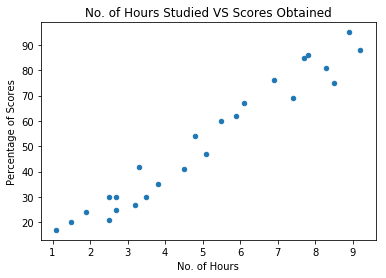

In [27]:
# 2_D Scatter Plot

data.plot(kind='scatter', x='Hours', y='Scores')
plt.title('No. of Hours Studied VS Scores Obtained')
plt.xlabel('No. of Hours')
plt.ylabel('Percentage of Scores')
plt.show()

**In the above graph, There is a positive linear relationship between no. of hours studied and scores obtained. Hence we proceed to fit linear regression model for further analysis.**

# Preparing the data

Divide the data into input and output

In [28]:
x= data.iloc[:,:-1].values
y= data.iloc[:,1].values

In [29]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# splitting the data into Train(80%) and Test(20%)


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [42]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [43]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [44]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [45]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [46]:
len(x_train), len(x_test), len(y_train), len(y_test)

(20, 5, 20, 5)

# Training The Algorithm

In [47]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(x_train, y_train)
print("Training Complete")

Training Complete


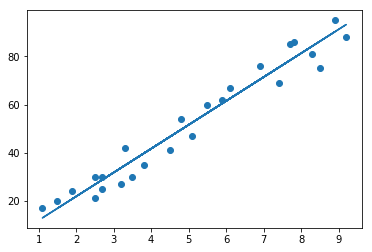

Equation of line: Y=  9.910656480642238 x + 2.018160041434669


In [48]:
# Plotting the regression line
line = Lr.coef_*x+Lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()
print(('Equation of line: Y= ') ,str(Lr.coef_[0]) ,('x +') ,str(Lr.intercept_))

# Testing The Model

In [50]:
print('Training Score: ', round(Lr.score(x_train,y_train)*100,2),'%')
print('Testing Score: ', round(Lr.score(x_test,y_test)*100,2),'%')

Training Score:  95.16 %
Testing Score:  94.55 %


In [51]:
# comparing Actual VS Predicted

y_pred = Lr.predict(x_test)

df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
df

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Model Evaluation

In [52]:
from sklearn.metrics import r2_score
from math import sqrt
from sklearn import metrics

k = x_test.shape[1]
n = len(x_test)
r2 = r2_score(y_test, y_pred)
adj_r2 =1-(1-r2)*(n-1)/(n-k-1)

print('R2=', r2,'\nAdjusted R2=', adj_r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

R2= 0.9454906892105355 
Adjusted R2= 0.9273209189473807
Mean Absolute Error: 4.18385989900298


# Data Prediction

In [53]:
Hours = 9.25
pred = Lr.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
